# Task 4: EMAIL SPAM DETECTION WITH MACHINE LEARNING


## Introduction:

In the digital age, email communication has become an integral part of our daily lives. However, alongside legitimate messages, the rise of spam emails has presented a significant challenge. Spam emails, characterized by their unsolicited nature and often malicious content, can pose threats such as scams and phishing attempts. Addressing this issue requires advanced tools, and one such solution is the development of an email spam detector using Python and machine learning.

This project aims to empower users with a tool that can automatically classify incoming emails as either spam or non-spam. Leveraging the capabilities of Python and machine learning algorithms, we will create a robust spam detector capable of learning from patterns and features within emails to make accurate predictions. By doing so, we contribute to enhancing email security and providing users with a more efficient and reliable means of filtering out unwanted and potentially harmful messages.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("spam.csv", encoding='latin1')      #Reads the spam Dataset

### Data Analysis

In [3]:
data.head()                                            #Displays spam Information upto 4 entries 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()                                            #Displays Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Data Exploration

In [5]:
data.shape                                             #Define shape of Dataset

(5572, 5)

In [6]:
data.isnull().sum()                       #Check the number of missing values in each column

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
data.columns                              #Define Columns in Dataset

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
data.tail(6)                              #Gives Information for Last 6 entries

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [9]:
data.describe()                          #Describes the dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [10]:
data.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [11]:
data.loc[data['v1'] == 'spam', 'v1',] = 0
data.loc[data['v1'] == 'ham', 'v1',] = 1

In [12]:
x = data['v2']
y = data['v1']

In [13]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [14]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object

## Data Visualization

### Class Distribution

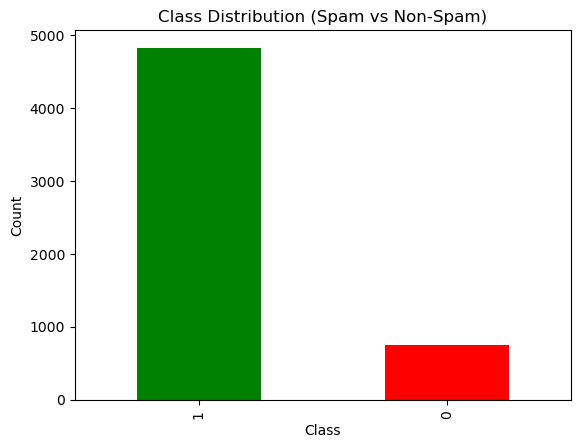

In [15]:
import matplotlib.pyplot as plt
import seaborn as sb

class_distribution = data['v1'].value_counts()
class_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution (Spam vs Non-Spam)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### Data Splitting with Training and Testing

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
feature_extraction=TfidfVectorizer(min_df=1 ,stop_words='english' , lowercase=True )

x_train_feature = feature_extraction.fit_transform(x_train)
x_test_feature = feature_extraction.transform(x_test)

y_train=y_train.astype('int')
y_test=y_test.astype('int')
     

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

In [20]:

model.fit(x_train_feature , y_train)

LogisticRegression()

In [21]:
pred=model.predict(x_test_feature)              #Model Evaluation

### Accuracy of Spam Dataset

In [22]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.96


### Prediction of Spam Dataset

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

user_input = input("Enter the email content: ")     # Example input email content

final_mail = feature_extraction.transform([user_input])  # Use the trained model to make predictions
result = model.predict(final_mail)

if result == 1:                                       # Display the prediction result
    print("The email is predicted to be a ham mail.")
else:
    print("The email is predicted to be a spam mail.")


Enter the email content: Sorry, I'll call later in meeting.
The email is predicted to be a ham mail.


## Conclusion:

In conclusion, the development of an email spam detector using Python and machine learning offers a proactive approach to combating the persistent issue of spam emails. By employing advanced algorithms, the detector becomes adept at recognizing patterns and characteristics associated with spam, thereby enhancing its accuracy over time. This project not only provides users with a practical tool to filter out unwanted emails but also serves as a testament to the power of technology in addressing cybersecurity challenges.

As email threats continue to evolve, the application of machine learning in spam detection becomes increasingly crucial. The spam detector developed in this project is not only a testament to the capabilities of Python in building practical applications but also an example of how machine learning can contribute to the security and efficiency of our digital communication systems. With this tool in place, users can experience a safer and more streamlined email experience, free from the disruptions caused by spam.